In [ ]:
# Logistic Regression Model
# Planar dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
iris = load_iris()
# Taking only two features in consideration
X = iris.data[:,:2]
Y = (iris.target != 0)*1
labels = Y.reshape([Y.shape[0],1]) 
X.shape, labels.shape

((150, 2), (150, 1))

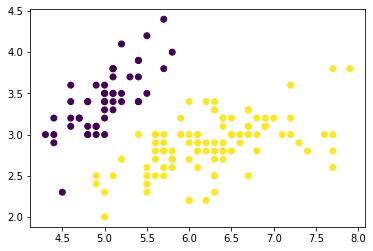

In [ ]:
# Plot iris data
plt.scatter(X[:,0],X[:,1], c = Y)

In [ ]:
def sigmoid_fn(z) :
  return 1.0/(1 + np.exp(-z))

def addintercept(X):
  """
  Input:
  X - input matrix of shape (m,nx-1)

  Returns:
  X - matrix of shape (m , nx)
  """
  b = np.ones((X.shape[0],1))
  return (np.concatenate((X,b), axis = 1))

def updation(X,Y,W,learning_rate):
  """
  Inputs:
  X - input matrix of shape (m, nx)
  Y - output labels of shape (m, 1)
  W - weight matrix of shape (nx, 1)
  learning_rate - float

  Returns:
  W - updated weight of shape (nx,1)
  """
  Z = np.dot(X,W)
  A = sigmoid_fn(Z)
  dZ = A - Y
  dW = np.dot(X.T, dZ) / (X.shape[0])
  W -= learning_rate * dW
  return W


In [ ]:
def logistic_Regression(X,Y,learning_rate,iterations = 30000, add_intercept = True):
  if add_intercept:
    X = addintercept(X)

  #Initialize Weights
  W = np.zeros((X.shape[1],1))
  for i in range(iterations):
    Wnew = updation(X,Y,W,learning_rate)
    W = Wnew

  return W

In [ ]:
weights = logistic_Regression(X, labels, 0.01, 30000, True)

In [ ]:
print (weights)

[[ 4.25484895]
 [-6.89384814]
 [-1.44883626]]


In [ ]:
from sklearn.metrics import accuracy_score
x = addintercept(X)
a = sigmoid_fn(np.dot(x, weights))
y_pred = map(lambda a: 1 if a >= 0.5 else 0, a)
y_pred = np.array(list(y_pred))
print('Training Accuracy:', accuracy_score(labels, y_pred)) 

Training Accuracy: 0.9933333333333333


In [ ]:
#Though trained models should not judged based on their training accuracy but this atleast tells us that the model learned something
#Comparing against sklearn's implementation
from sklearn.linear_model import LogisticRegression
# putting C to a very high value to discard regularization as we have not added regularization term
mdl = LogisticRegression(C=1e15, max_iter =30000)
mdl.fit(X, Y)
print(mdl.coef_, mdl.intercept_)
print(weights)

[[ 134.80324317 -147.37951529]] [-276.6772754]
[[ 4.25484895]
 [-6.89384814]
 [-1.44883626]]
